In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
%matplotlib inline



In [2]:
# THIS DATASET WAS EXPORTED FROM THE IESO WEBSITE, AND IT CONTAINS ENERGY DEMAND DATA OF THE PROVINVE OF ONTARIO IN TIME SERIES

# import dataset

df = pd.read_csv("marketdemand_on_2002-2021.csv")

# check the dataset using df.head
print("="*42)
print("First 5 rows")
print("="*42)
print(df.head())
print("="*42)

# check general info of the dataset
print("General information of the dataset")
print("="*42)
print(df.info())
print("="*42)

# describe the dataset
print("General stats of the dataset")
print("="*42)
print(df.describe())
print("="*42)

# check for any null value
print("Null value check")
print("="*42)
print(df.isnull().sum(),"\n")



First 5 rows
          Datetime  MarketDemand_MW
0  2002-05-01 1:00            14141
1  2002-05-01 2:00            13876
2  2002-05-01 3:00            13974
3  2002-05-01 4:00            13898
4  2002-05-01 5:00            14378
General information of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170664 entries, 0 to 170663
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Datetime         170664 non-null  object
 1   MarketDemand_MW  170664 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.6+ MB
None
General stats of the dataset
       MarketDemand_MW
count    170664.000000
mean      18042.087499
std        2485.960008
min        2270.000000
25%       16176.000000
50%       17914.000000
75%       19692.000000
max       27999.000000
Null value check
Datetime           0
MarketDemand_MW    0
dtype: int64 



In [3]:
# Create a new dataframe, and reformat the datetime column
# Separate datetime column into year, month, day, time, week

dataset = df
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.isocalendar().week
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = df.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(1)

,MarketDemand_MW,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2002-05-01 01:00:00,14141,5,2002,2002-05-01,01:00:00,18,Wednesday


In [4]:
# Check for how many unique year does the dataset contain

print(df.Year.unique())
print("="*100)
print("Total Number of Unique Year =", df.Year.nunique())

[2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019 2020 2021]
Total Number of Unique Year = 20


Text(0.5, 1.0, 'Market Energy Demand of Ontario vs Year')

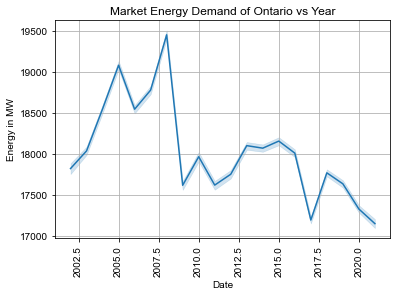

In [5]:
# now use matplotlib to check for the energy consumption of each year

from matplotlib import style

fig = plt.figure()
axl = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Year"], y=dataset["MarketDemand_MW"], data=df)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Energy Demand")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)

for label in axl.xaxis.get_ticklabels():
    label.set_rotation(90)
    
plt.title("Market Energy Demand of Ontario vs Year")


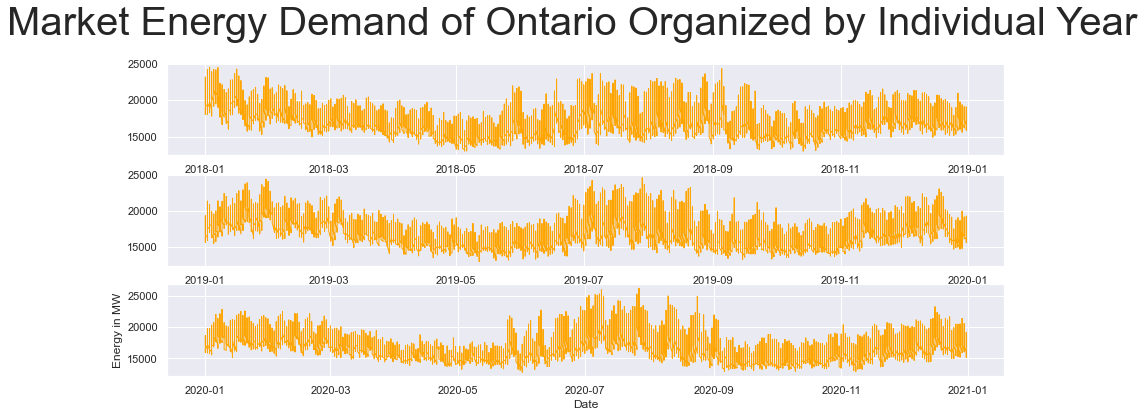

In [6]:
# Check for energy consumption of individual year

from matplotlib import style


fig = plt.figure()
st = fig.suptitle("Market Energy Demand of Ontario Organized by Individual Year", fontsize=40)
ax1= fig.add_subplot(311)
ax2= fig.add_subplot(312)
ax3= fig.add_subplot(313)


style.use('ggplot')

y_2018 = dataset.loc["2018"]["MarketDemand_MW"].to_list()
x_2018 = dataset.loc["2018"]["Date"].to_list()
ax1.plot(x_2018,y_2018, color="orange", linewidth=1)


y_2019 = dataset.loc["2019"]["MarketDemand_MW"].to_list()
x_2019 = dataset.loc["2019"]["Date"].to_list()
ax2.plot(x_2019, y_2019, color="orange", linewidth=1)


y_2020 = dataset.loc["2020"]["MarketDemand_MW"].to_list()
x_2020 = dataset.loc["2020"]["Date"].to_list()
ax3.plot(x_2020, y_2020, color="orange", linewidth=1)


plt.rcParams["figure.figsize"] = (18,8)
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)


fig.subplots_adjust(top=0.85)

Text(0.5, 1.0, 'Energy Distribution')

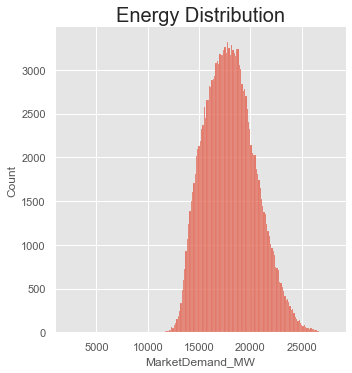

In [9]:
# use seaborn to create an energy distribution graph

sns.displot(dataset["MarketDemand_MW"])
plt.title("Energy Distribution",size=20)

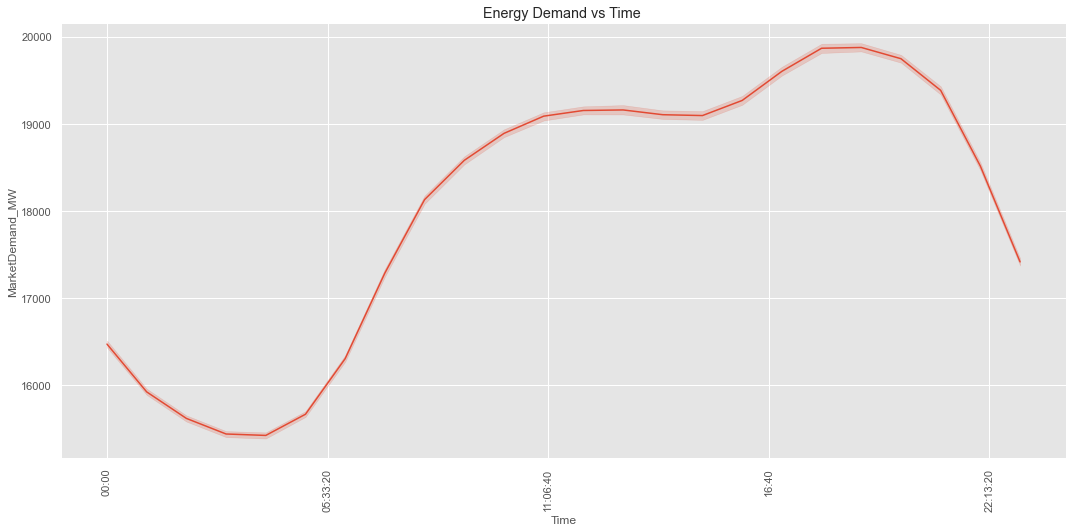

In [10]:
# plot time against energy demand
pd.plotting.register_matplotlib_converters() #this convert datetime to strings
fig = plt.figure()
ax1= fig.add_subplot(111)

sns.lineplot(x=dataset["Time"],y=dataset["MarketDemand_MW"], data=df)
plt.title("Energy Demand vs Time ")
plt.xlabel("Time")
plt.grid(True, alpha=1)

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

In [9]:
# In order to speed up the machine learning algo, resampling of the data is need. Take the mean of energy demand of each day

In [11]:
NewDataSet = dataset.resample('D').mean()
print("Old Dataset ",dataset.shape )
print("New  Dataset ",NewDataSet.shape )

Old Dataset  (170664, 7)
New  Dataset  (7111, 4)


In [12]:
TestData = NewDataSet.tail(100)

Training_Set = NewDataSet.iloc[:,0:1]

Training_Set = Training_Set[:-60]

In [12]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (4933, 1)
Test Set Shape  (100, 4)


In [13]:
from sklearn.preprocessing import MinMaxScaler


Training_Set = Training_Set
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

In [14]:
import numpy as np

X_Train = []
Y_Train = []

# Range should be from 60 Values to END 
for i in range(60, Train.shape[0]):
    
    # X_Train 0-59 
    X_Train.append(Train[i-60:i])
    
    # Y Would be 60 th Value based on past 60 Values 
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(6991, 60, 1)
(6991, 1)


In [15]:
# Shape should be Number of [Datapoints , Steps , 1 )
# we convert into 3-d Vector or #rd Dimesnsion
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(6991, 60, 1)

In [18]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import LSTM

regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [19]:
regressor.fit(X_Train, Y_Train, epochs = 50, batch_size = 32)

Epoch 1/50
219/219 [==============================] - 19s 87ms/step - loss: 0.0191
Epoch 2/50
219/219 [==============================] - 20s 93ms/step - loss: 0.0141
Epoch 3/50
219/219 [==============================] - 20s 93ms/step - loss: 0.0130
Epoch 4/50
219/219 [==============================] - 19s 86ms/step - loss: 0.0126
Epoch 5/50
219/219 [==============================] - 19s 87ms/step - loss: 0.0123
Epoch 6/50
219/219 [==============================] - 16s 73ms/step - loss: 0.0121
Epoch 7/50
219/219 [==============================] - 17s 76ms/step - loss: 0.0119
Epoch 8/50
219/219 [==============================] - 16s 75ms/step - loss: 0.0114
Epoch 9/50
219/219 [==============================] - 16s 75ms/step - loss: 0.0104
Epoch 10/50
219/219 [==============================] - 16s 74ms/step - loss: 0.0091
Epoch 11/50
219/219 [==============================] - 17s 77ms/step - loss: 0.0078
Epoch 12/50
219/219 [==============================] - 16s 75ms/step - loss: 0.0072
E

In [20]:
TestData.head(2)

,MarketDemand_MW,Month,Year,Week
Datetime,,,,
2021-07-11,15992.958333,7.0,2021.0,27.0
2021-07-12,17973.000000,7.0,2021.0,28.0


In [21]:
TestData.shape

(100, 4)

In [22]:
NewDataSet.shape

(7111, 4)

In [23]:
Df_Total = pd.concat((NewDataSet[["MarketDemand_MW"]], TestData[["MarketDemand_MW"]]), axis=0)

In [24]:
Df_Total.shape

(7211, 1)

In [25]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs.shape

(160, 1)

In [26]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

# Reshape the data
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])
    
# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model 
predicted_stock_price = regressor.predict(X_test)

# Do inverse Transformation to get Values 
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [27]:
# convert index to list
True_MegaWatt = TestData["MarketDemand_MW"].to_list()
Predicted_MegaWatt  = predicted_stock_price
dates = TestData.index.to_list()

In [28]:
MachineLearningModel_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueMegaWatt": True_MegaWatt,
    "PredictedMeagWatt":[x[0] for x in Predicted_MegaWatt ]
})

In [29]:
MachineLearningModel_Df

,Date,TrueMegaWatt,PredictedMeagWatt
0,2021-07-11,15992.958333,16629.359375
1,2021-07-12,17973.000000,16334.768555
2,2021-07-13,18928.250000,17806.244141
3,2021-07-14,19376.875000,18306.994141
4,2021-07-15,19825.291667,17878.626953
...,...,...,...
95,2021-10-14,16401.708333,16565.207031
96,2021-10-15,16512.083333,16267.501953
97,2021-10-16,15658.666667,15909.332031
98,2021-10-17,15541.458333,15798.391602


Text(0.5, 1.0, 'True Market Demand and Machine Predicted Market Demand vs Dates')

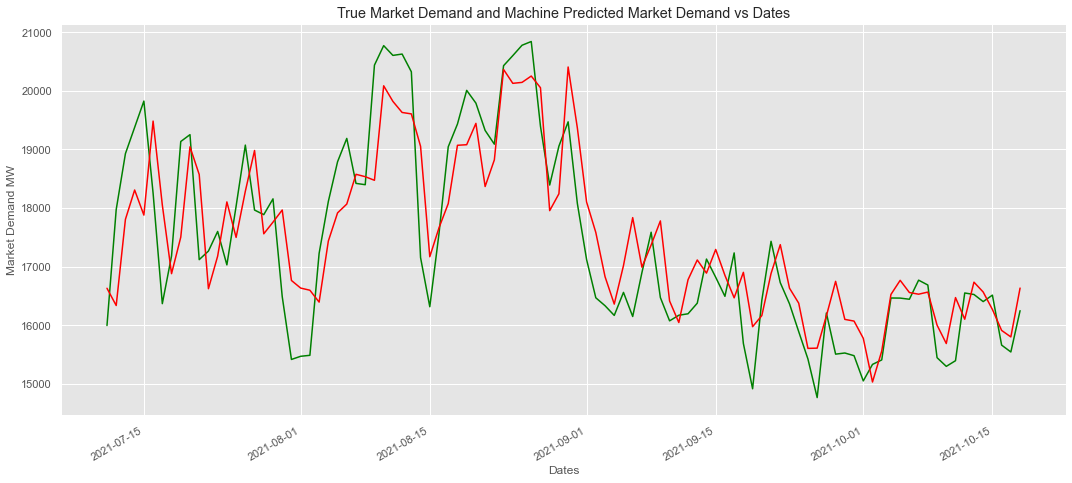

In [30]:
# Visualize the model

fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates
y = True_MegaWatt

y1 = Predicted_MegaWatt

plt.plot(x,y, color="green")
plt.plot(x,y1, color="red")
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Market Demand MW")
plt.title("True Market Demand and Machine Predicted Market Demand vs Dates")
